In [18]:
from tensorflow import keras
from keras.layers import Dense,Flatten,Input
from keras.models import Sequential
from keras.utils import plot_model,to_categorical
from keras.datasets import mnist
import cv2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

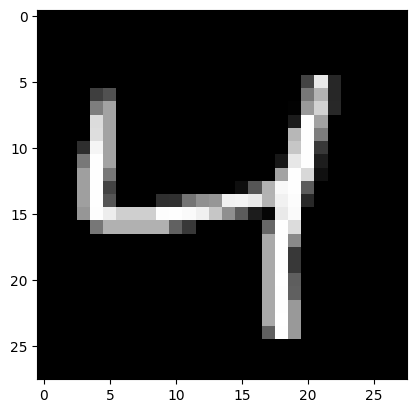

In [4]:

plt.imshow(X_train[2], cmap = 'gray')

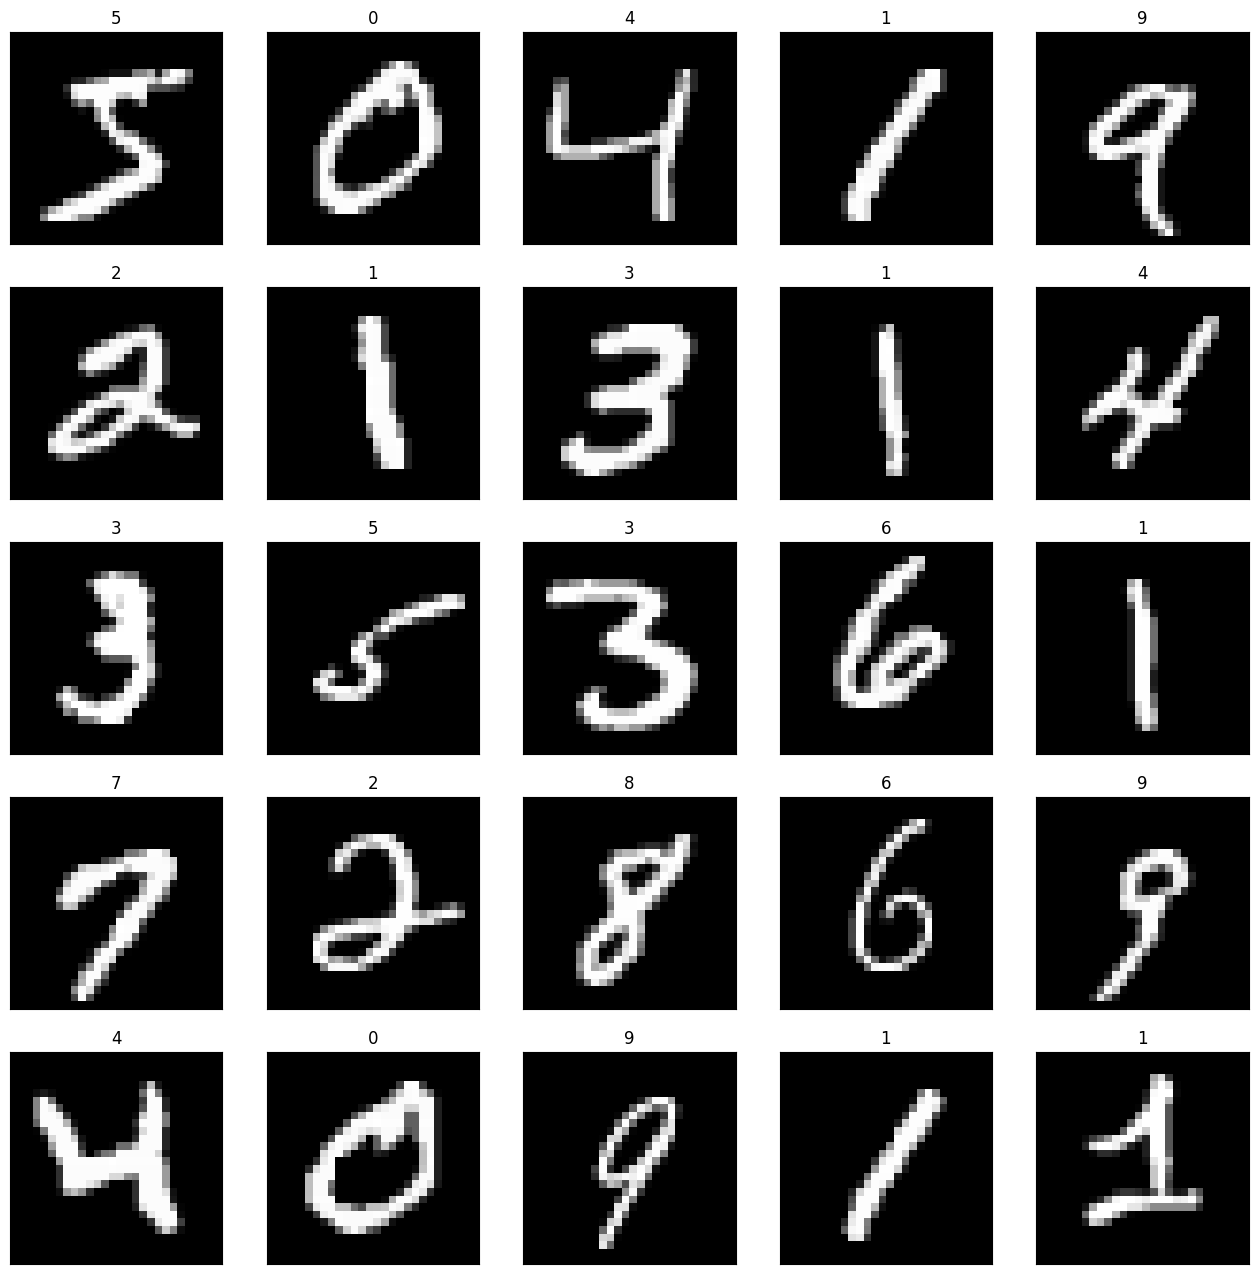

In [5]:

plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap = 'gray')
  plt.title(f'{y_train[i]}')
  plt.xticks([])
  plt.yticks([])


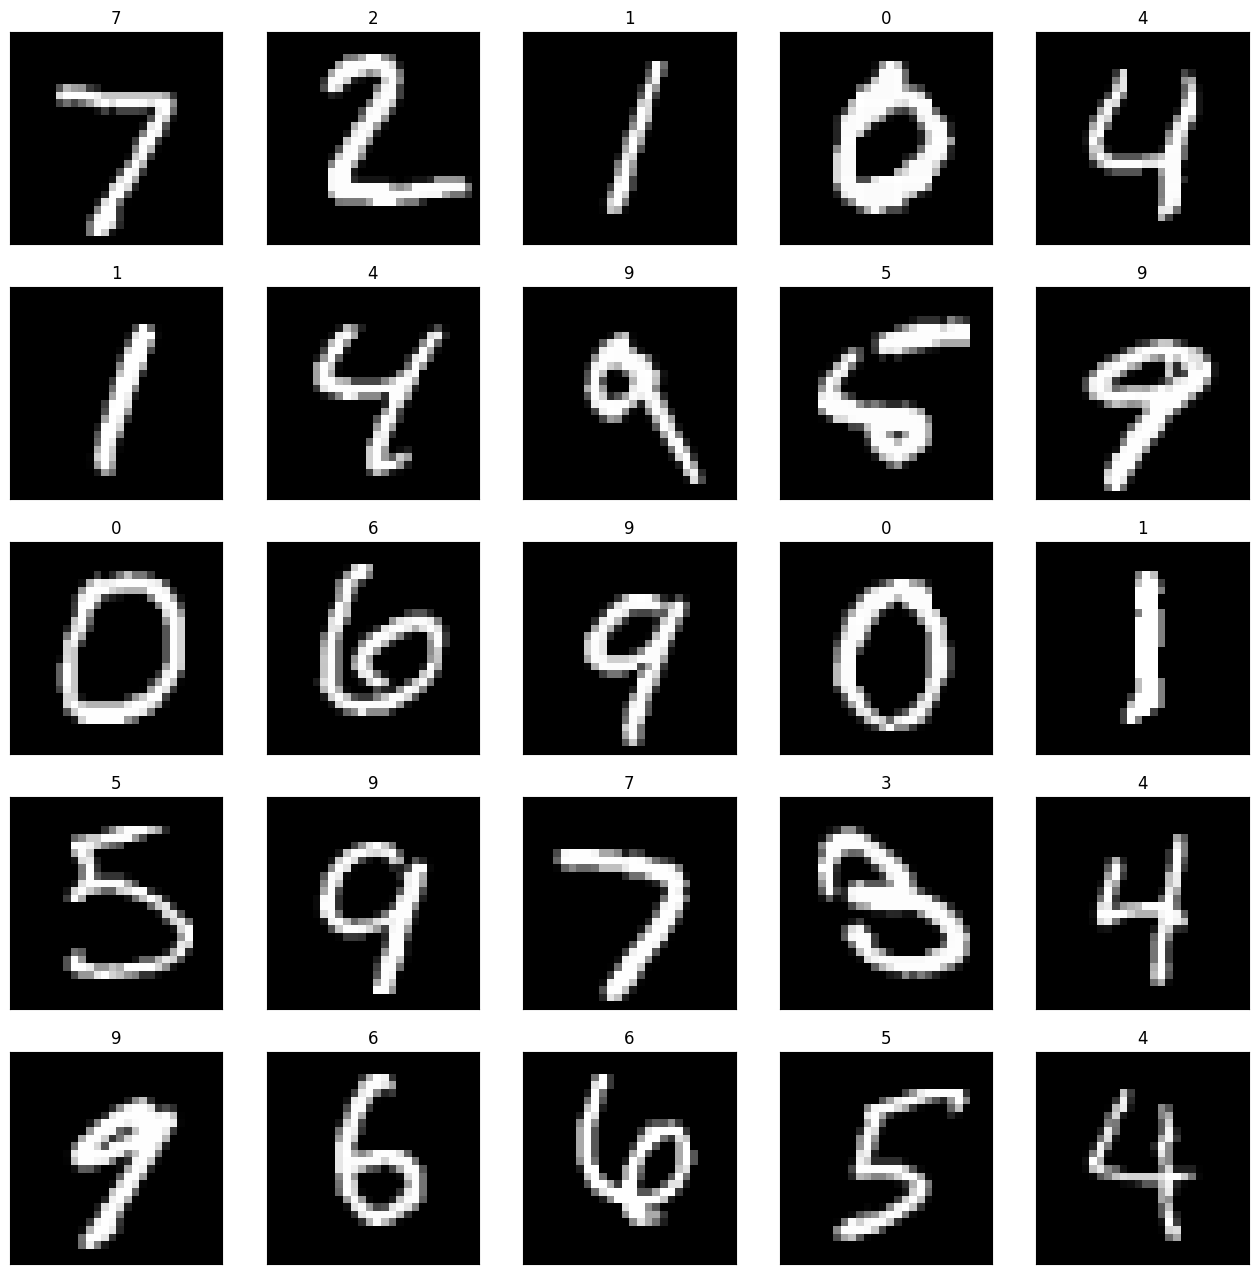

In [6]:

plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap = 'gray')
  plt.title(f'{y_test[i]}')
  plt.xticks([])
  plt.yticks([])

<Axes: ylabel='count'>

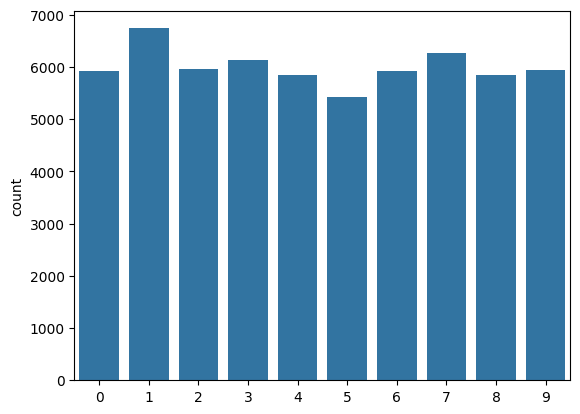

In [7]:
sns.countplot(x = y_train)

In [8]:
#Normalize
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(-1,X_train[0].size)
X_train.shape

(60000, 784)

In [10]:
X_test = X_test.reshape(-1,X_test[0].size)
X_test.shape


(10000, 784)

In [11]:
y_train_new = to_categorical(y_train)

y_train_new.shape

(60000, 10)

In [12]:
y_test_new = to_categorical(y_test)
y_test_new.shape

(10000, 10)

<h1>Build Model</h1>

In [13]:
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [14]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.fit(X_train,y_train_new,epochs = 10,batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9421 - loss: 0.1884
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9733 - loss: 0.0906
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9799 - loss: 0.0680
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9843 - loss: 0.0530
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9860 - loss: 0.0458
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9880 - loss: 0.0408
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9902 - loss: 0.0349
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9910 - loss: 0.0331
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9925 - loss: 0.0267
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9916 - loss: 0.0319


In [35]:
new_image = cv2.imread('../datasets/images/new-char1.jpg',0)
new_image.shape

(1031, 1001)

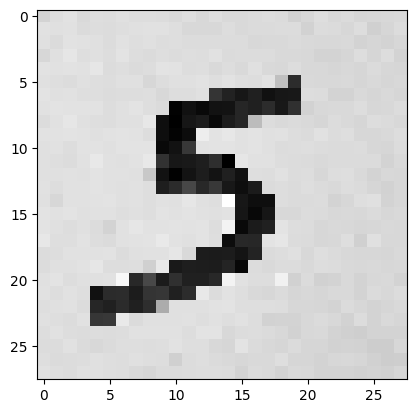

In [36]:
new_image = cv2.resize(new_image,(28,28))
plt.imshow(new_image,cmap='gray')

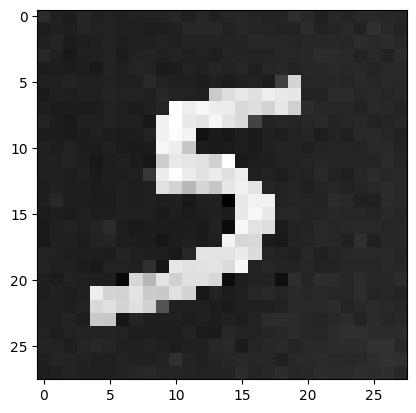

In [37]:
new_image = 255 - new_image
plt.imshow(new_image,cmap='gray')

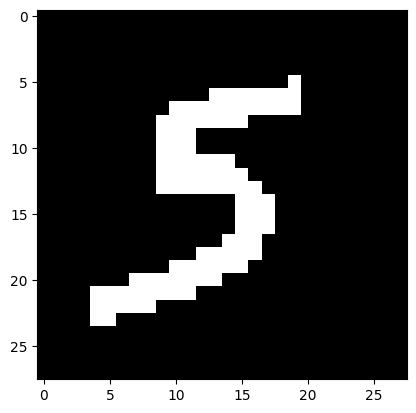

In [38]:
#scalling image

_,new_image = cv2.threshold(new_image,127,255,cv2.THRESH_BINARY)
plt.imshow(new_image,cmap='gray')

In [39]:
new_image = new_image.reshape(1,784)

In [40]:
result= model.predict(new_image)
np.argmax(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


np.int64(5)